# Practica 6 - Serie discreta de Fourier

**Author:** Cristian David Araujo A.

**ID:** 1089568350

**Date:** 09/10/2024

## Generación de Señales

Dada la señal:

$$
x(n) =
\begin{cases} 
2 \cdot (C + 1), & -\frac{N}{2} < n < 0 \\
0, & n = 0 \\
-2 \cdot (C + 1), & 0 < n < \frac{N}{2}
\end{cases}
$$

Donde:

$$
N = 30 + C \cdot 2
$$

y \( C \) es el último dígito de tu cédula. (0)

### 1. Grafique la señal x(n) con su respectivo vector de tiempo n para una frecuencia de muestreo de 1Hz. ¿Qué puede decir sobre la señal graficada? Nota: use la función plt.stem(n,x) para graficar la señal.


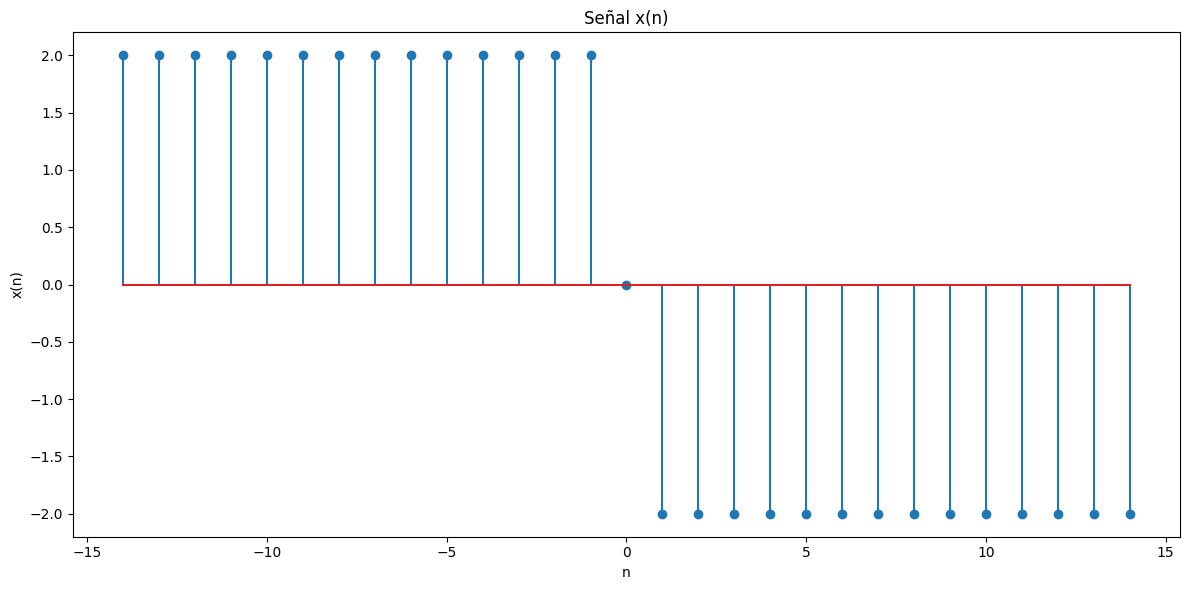

In [127]:
### 1. Grafique la señal x(n) con su respectivo vector de tiempo n para una frecuencia de muestreo de 1Hz. ¿Qué puede decir sobre la señal graficada? Nota: use la función plt.stem(n,x) para graficar la señal.

import matplotlib.pyplot as plt
import numpy as np

#Funcion por tramos
def x(n, N, C):
    if ((-N/2) < n) and (n < 0):
        return 2*(C + 1)
    elif n == 0:
        return 0
    elif (0 < n) and (n < (N/2)):
        return  -2*(C + 1)
    else:
        return 0

#Constantes
C = 0
N = 30 + (2*C)

#Vector de tiempo
Fs = 1 #Frecuencia de muestreo
n = np.arange(-N/2 + 1/Fs, N/2, 1/Fs)
x = [x(i, N, C) for i in n]

#Grafica
plt.figure(figsize=(12, 6))
plt.stem(n, x)
plt.title('Señal x(n)')
plt.xlabel('n')
plt.ylabel('x(n)')
#plt.grid()
plt.tight_layout()
plt.show()



### 2. Es la señal par o impar. ¿Por qué?


Es una señal impar ya que x(n) = -x(-n) para todo n en el dominio de la señal.

## Coeficientes de la serie de Fourier

### 1. Calcule los coeficientes par e impar de la serie de Fourier para un k = 12.

In [128]:
### 1. Calcule los coeficientes par e impar de la serie de Fourier para un k = 12.
import pandas as pd

# Función para calcular el coeficiente de Fourier para un k dado
def coeficiente_k(x, N, k):
    ck = [(1/N) * np.sum(x * np.exp(-1j * 2 * np.pi * k * n / N)) for k in range(k)]
    return ck

# Calcular coeficientes para valores de k
k = 13
c_k = coeficiente_k(x, N, k)
c_k_par = np.real(c_k)
c_k_impar = np.imag(c_k)

# Crear DataFrame con los coeficientes
df = pd.DataFrame({'k': range(k), 'c_k_par': c_k_par, 'c_k_impar': c_k_impar})

# Mostrar DataFrame
print(df)

     k       c_k_par     c_k_impar
0    0  0.000000e+00  0.000000e+00
1    1  1.480297e-17  1.268582e+00
2    2  1.480297e-17  1.110223e-16
3    3  0.000000e+00  4.103578e-01
4    4  7.401487e-18  3.256654e-16
5    5  3.700743e-18  2.309401e-01
6    6  4.440892e-17 -2.886580e-16
7    7  2.775558e-17  1.480817e-01
8    8  2.312965e-17 -4.366877e-16
9    9 -3.330669e-17  9.687234e-02
10  10 -7.401487e-18 -5.921189e-16
11  11  0.000000e+00  5.936382e-02
12  12 -7.401487e-18 -6.217249e-16


### 2. Grafique en un subplot el espectro de potencia para la parte par y la impar. ¿Qué puede concluir a partir de esto? ¿Tiene coeficientes en cero o muy cercanos a cero? ¿Por qué?


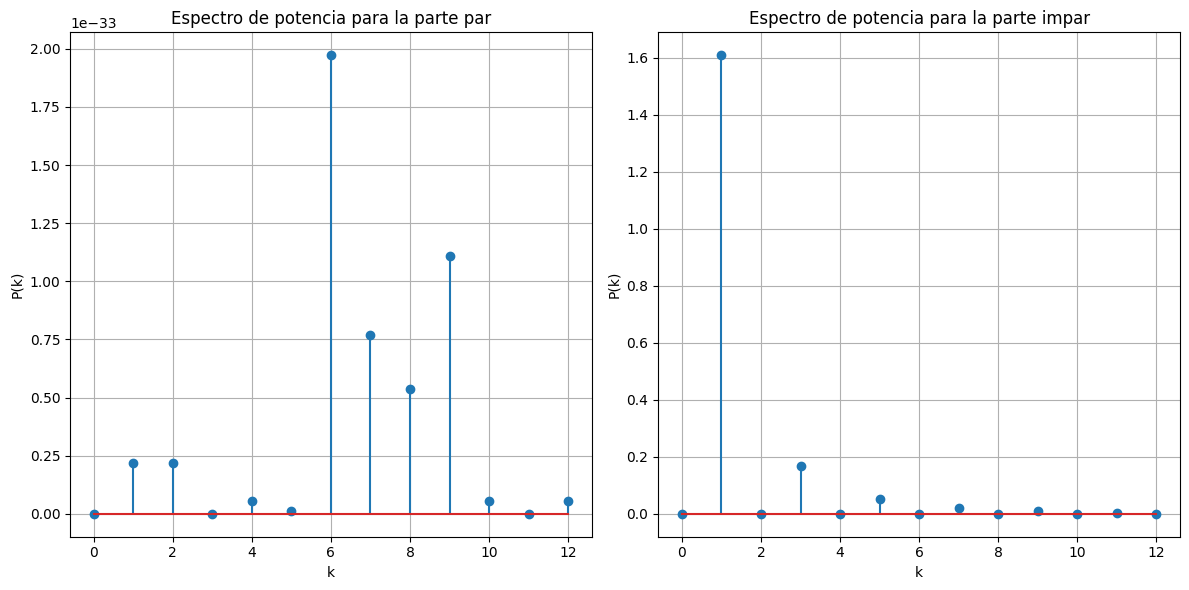

In [129]:
### 2. Grafique en un subplot el espectro de potencia para la parte par y la impar. ¿Qué puede concluir a partir de esto? ¿Tiene coeficientes en cero o muy cercanos a cero? ¿Por qué?

# Función para calcular el espectro de potencia
def espectro_potencia(c_k):
    return np.abs(c_k)**2

# Calcular el espectro de potencia para la parte par e impar
P_par = espectro_potencia(c_k_par)
P_impar = espectro_potencia(c_k_impar)

k_values = np.arange(0, k)

# Graficar el espectro de potencia
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.stem(k_values, P_par)
plt.title('Espectro de potencia para la parte par')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.grid()
plt.subplot(1, 2, 2)
plt.stem(k_values, P_impar)
plt.title('Espectro de potencia para la parte impar')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.grid()
plt.tight_layout()
plt.show()

### 3. Construya los coeficientes Ck a partir de los coeficientes pares e impares y grafíquelos. Nota: recuerde que el espectro es simétrico, por lo tanto debe reflejar los coeficientes para construir la parte negativa del espectro. Debería obtener una gráfica como la siguiente:


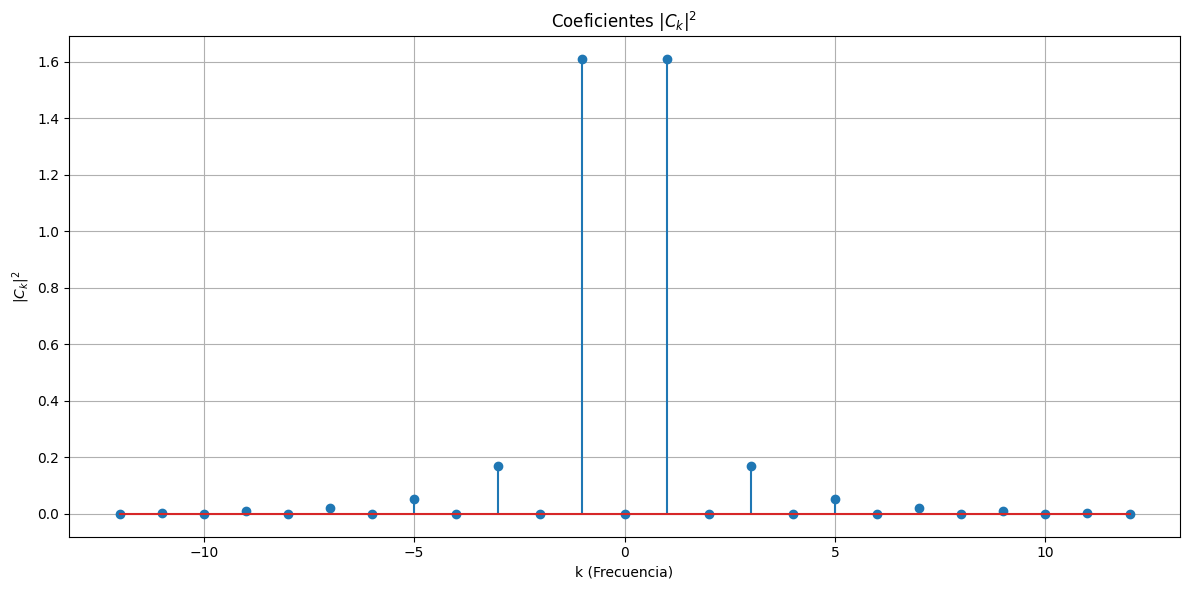

In [130]:
### 3. Construya los coeficientes Ck a partir de los coeficientes pares e impares y grafíquelos. Nota: recuerde que el espectro es simétrico, por lo tanto debe reflejar los coeficientes para construir la parte negativa del espectro. Debería obtener una gráfica como la siguiente:

combined_coefficients = c_k_impar + c_k_par

magnitud_c_k = np.abs(combined_coefficients)**2


# Create symmetric magnitude for negative frequencies
magnitud_c_k_sym = np.concatenate((magnitud_c_k, magnitud_c_k[::-1][:-1]))


# Create symmetric k values for the plot
k_values_sym = np.concatenate((k_values, -k_values[::-1][:-1]))

# Plotting the coefficients Ck
plt.figure(figsize=(12, 6))
plt.stem(k_values_sym, magnitud_c_k_sym)
plt.title('Coeficientes $|C_k|^2$')
plt.xlabel('k (Frecuencia)')
plt.ylabel('$|C_k|^2$')
plt.grid()
plt.tight_layout()
plt.show()

### 4. Calcule la potencia de la señal a partir de los coeficientes encontrados y compruebe el teorema de Parseval. ¿Obtuvo el resultado esperado? Explique.


In [131]:
### 4. Calcule la potencia de la señal a partir de los coeficientes encontrados y compruebe el teorema de Parseval. ¿Obtuvo el resultado esperado? Explique.

# Calcular la potencia de la señal a partir de los coeficientes Ck
P_signal = np.sum(magnitud_c_k_sym)

# Convertir la lista x a un array de NumPy
x_array = np.array(x)

# Calcular la potencia de la señal a partir de la señal original 
P_signal_x = np.sum(x_array**2) / N

# Comprobar el teorema de Parseval
print('Potencia de la señal a partir de los coeficientes Ck:', P_signal)
print('Potencia de la señal a partir de la señal original:', P_signal_x)


Potencia de la señal a partir de los coeficientes Ck: 3.7317269229543464
Potencia de la señal a partir de la señal original: 3.7333333333333334


## Síntesis de señales

### 1. Reconstruya la señal x(n) a partir de los coeficientes extraídos usando la ecuación de síntesis (Ecuación 1). Grafique y concluya acerca de la señal obtenida.


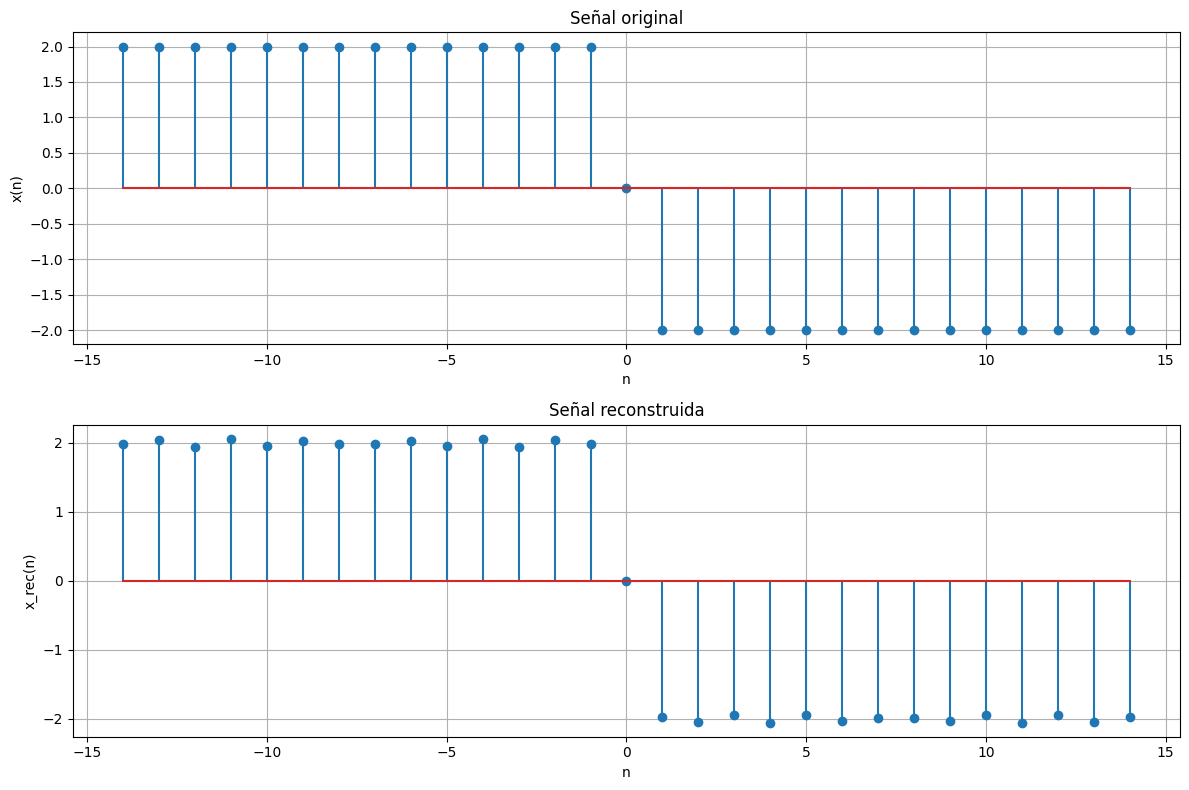

In [132]:
### 1. Reconstruya la señal x(n) a partir de los coeficientes extraídos usando la ecuación de síntesis (Ecuación 1). Grafique y concluya acerca de la señal obtenida.

# Función para reconstruir la señal a partir de los coeficientes Ck
def reconstruir_senal(C_k, N, n):
    x_rec = np.zeros(len(n), dtype=complex)  # Crear un array complejo para la señal reconstruida
    for i in range(len(C_k)):
        x_rec += C_k[i] * np.exp(1j * 2 * np.pi * i * n / N)
    return 2*x_rec

# Reconstruir la señal a partir de los coeficientes Ck
x_rec = reconstruir_senal(c_k, N, n)

# Graficar la señal original y la señal reconstruida
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.stem(n, x)
plt.title('Señal original')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, np.real(x_rec))
plt.title('Señal reconstruida')
plt.xlabel('n')
plt.ylabel('x_rec(n)')
plt.grid()

plt.tight_layout()
plt.show()